In [1]:
from pathlib import Path
from fastai.datasets import *
from fastai.vision import *

In [2]:
path = untar_data(URLs.MNIST)
data = ImageDataBunch.from_folder(path, train="training", valid="testing")

In [3]:
learner = cnn_learner(data, models.resnet34, metrics=[accuracy, error_rate])

In [4]:
learner.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.818153,0.527345,0.834600,0.165400,01:21
1,0.380313,0.244629,0.923500,0.076500,01:19
2,0.213740,0.119992,0.961200,0.038800,01:18
3,0.134841,0.079481,0.975600,0.024400,01:19
4,0.112825,0.060417,0.981400,0.018600,01:19
5,0.086990,0.050003,0.983700,0.016300,01:19
6,0.068527,0.045189,0.985000,0.015000,01:19
7,0.068577,0.041818,0.986100,0.013900,01:20
8,0.049391,0.040817,0.986900,0.013100,01:17
9,0.053308,0.042665,0.985900,0.014100,01:18


In [5]:
learner.save("resnet34", return_path=True)

PosixPath('/home/jupyter/.fastai/data/mnist_png/models/resnet34.pth')

In [37]:
learner = learner.load("resnet34")

In [38]:
val_loss, val_accuracy, val_err_rate = learner.validate(data.test_ds)
print(f"Validation loss: {val_loss:.4f}")
print(f"Validation accuracy: {val_accuracy:.4f}")
print(f"Validation error rate: {val_err_rate:.4f}")

Validation loss: 1.6206
Validation accuracy: 0.6000
Validation error rate: 0.4000


## Analyse own handwritten data

### What format do we need?

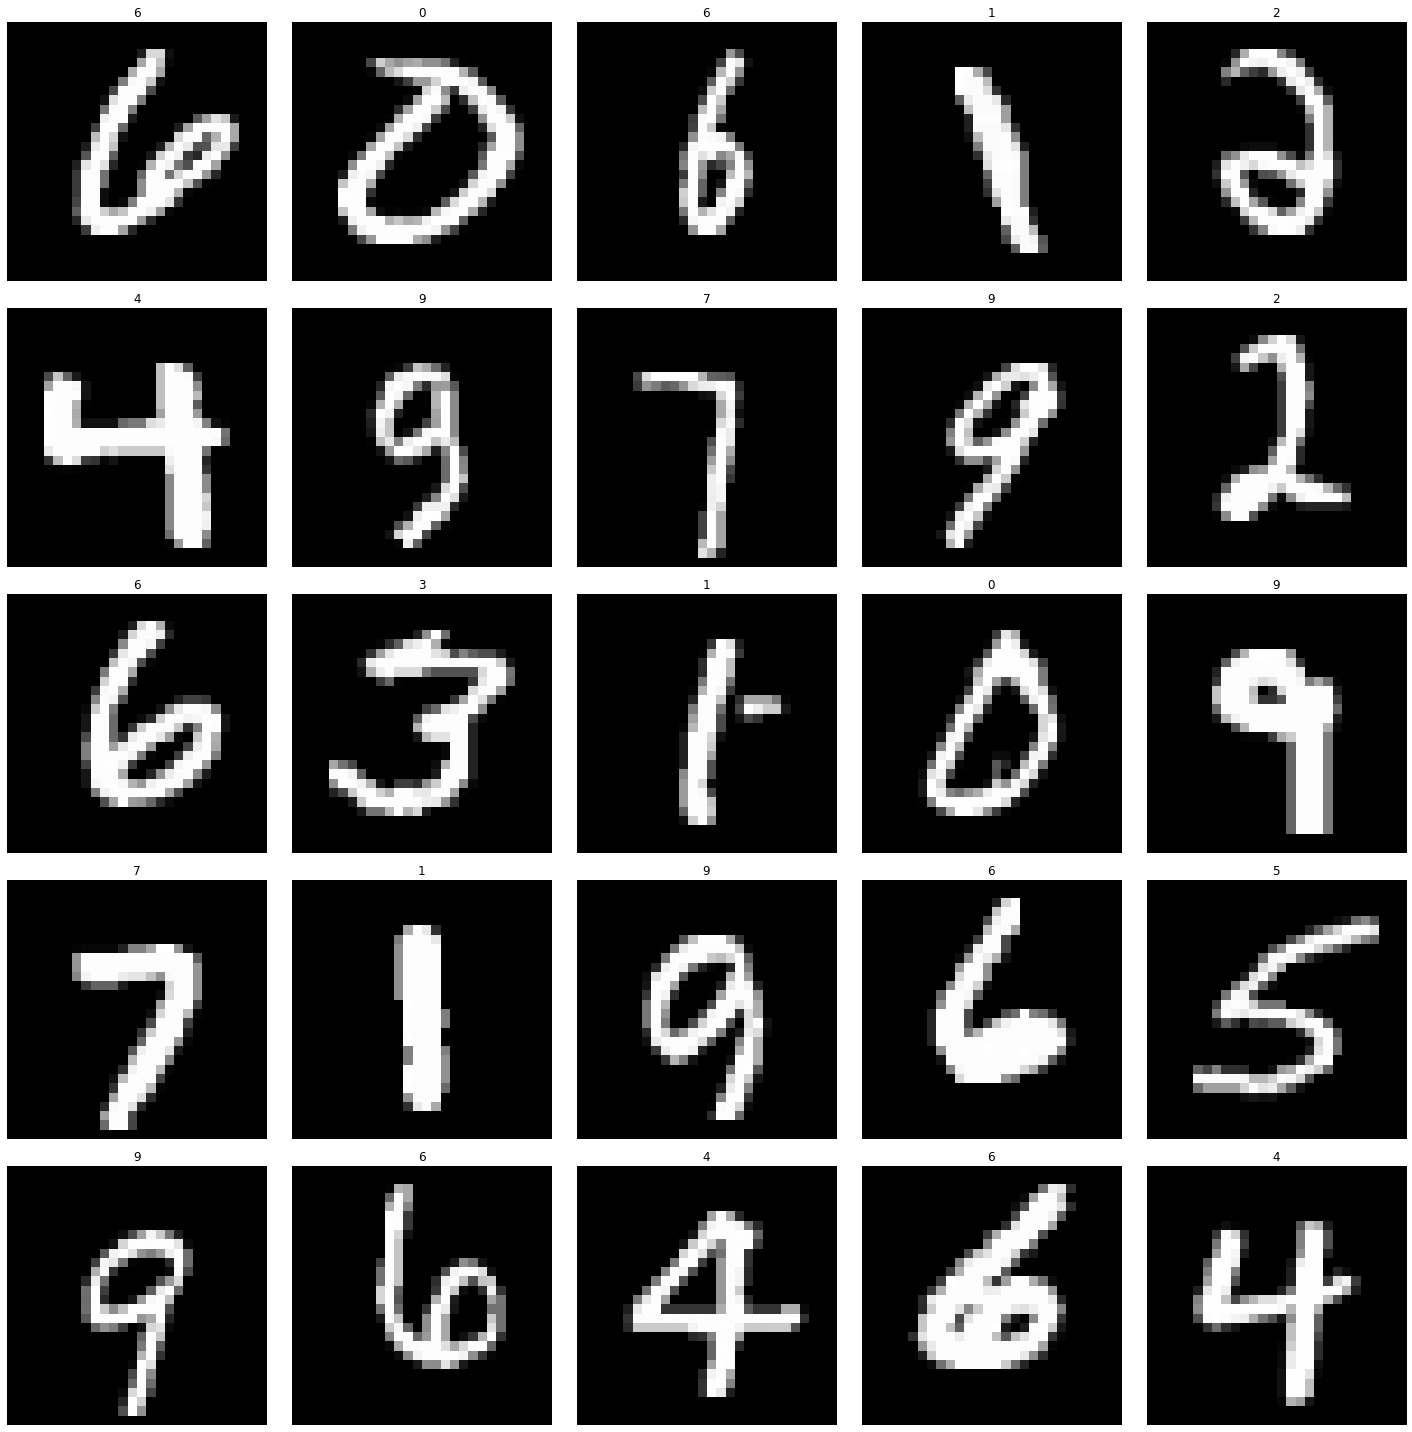

In [8]:
data.show_batch()

In [62]:
im_path = Path("./010_experimental-preprocessing/results")
fn_paths = im_path.glob("*/*.png")

val_data = ImageDataBunch.from_name_re(
    path=im_path,
    fnames=fn_paths,
    pat=r"/([0-9])\/[0-9]+.png$",
    valid_pct=0.4,
    bs=2,
)

In [63]:
learner.data = val_data
learner.unfreeze()
learner.validate()

[1.5496643, tensor(0.6500), tensor(0.3500)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


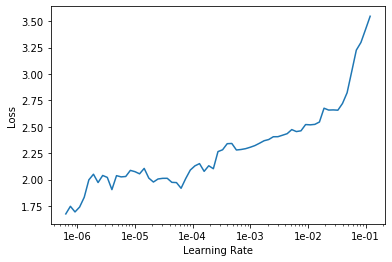

In [64]:
learner.lr_find()
learner.recorder.plot()

In [68]:
df = learner.fit_one_cycle(10, slice(1e-5, 1e-8))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.053838,2.979639,0.650000,0.350000,00:02
1,2.182774,1.788043,0.675000,0.325000,00:02
2,2.618929,1.121957,0.725000,0.275000,00:02
3,2.583848,2.161443,0.675000,0.325000,00:02
4,2.303438,2.178622,0.675000,0.325000,00:02
5,2.281045,2.081099,0.675000,0.325000,00:02
6,2.157145,2.787247,0.625000,0.375000,00:02
7,2.206095,1.414769,0.675000,0.325000,00:02
8,2.242682,1.648438,0.600000,0.400000,00:02
9,2.173364,1.559176,0.725000,0.275000,00:02


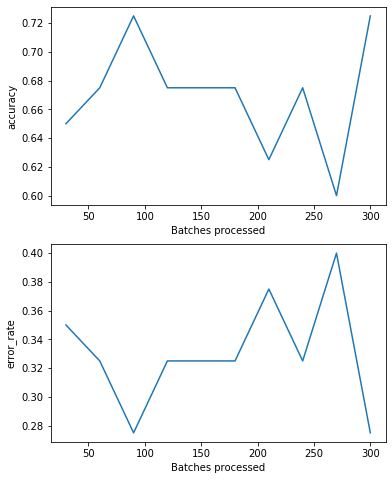

In [73]:
learner.recorder.plot_metrics()

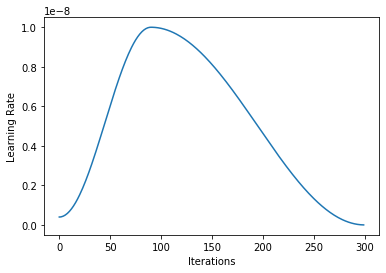

In [74]:
learner.recorder.plot_lr()